In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

import math as m
from sklearn.metrics import accuracy_score
from numpy import array

%matplotlib inline


In [2]:
data = pd.read_csv('wdbc_data.csv', header=None)
data = data.iloc[:,1:]
data

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
data.iloc[:,0].value_counts()

B    357
M    212
Name: 1, dtype: int64

In [4]:
X = data.iloc[:300,1:]
y = data.iloc[:300,0]
y = np.where(y =='M', -1, y) 
y = np.where(y =='B', 1, y) 
y = y.astype('int')

print(X.shape, y.shape)

(300, 30) (300,)


In [5]:
X_1 = X.iloc[:30,:]
y_1 = y[:30]
X_2 = X.iloc[30:60,:]
y_2 = y[30:60]
X_3 = X.iloc[60:90,:]
y_3 = y[60:90]
X_4 = X.iloc[90:120,:]
y_4 = y[90:120]
X_5 = X.iloc[120:150,:]
y_5 = y[120:150]
X_6 = X.iloc[150:180,:]
y_6 = y[150:180]
X_7 = X.iloc[180:210,:]
y_7 = y[180:210]
X_8 = X.iloc[210:240,:]
y_8 = y[210:240]
X_9 = X.iloc[240:270,:]
y_9 = y[240:270]
X_10 = X.iloc[270:300,:]
y_10 = y[270:300]


#10 fold cross-validation 
X_train1 = pd.concat([X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10], axis=0)
y_train1 = np.concatenate((y_2, y_3, y_4, y_5, y_6, y_7, y_8, y_9, y_10), axis=None)
y_train1 = y_train1.astype('int')

X_val1 = X_1
y_val1 = y_1
y_val1 = y_val1.astype('int')

X_train2 = pd.concat([X_1, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10], axis=0)
y_train2 = np.concatenate((y_1, y_3, y_4, y_5, y_6, y_7, y_8, y_9, y_10), axis=None)
y_train2 = y_train2.astype('int')

X_val2 = X_2
y_val2 = y_2
y_val2 = y_val2.astype('int')

X_train3 = pd.concat([X_1, X_2, X_4, X_5, X_6, X_7, X_8, X_9, X_10], axis=0)
y_train3 = np.concatenate((y_1, y_2, y_4, y_5, y_6, y_7, y_8, y_9, y_10), axis=None)
y_train3 = y_train3.astype('int')

X_val3 = X_3
y_val3 = y_3
y_val3 = y_val3.astype('int')

X_train4 = pd.concat([X_1, X_2, X_3, X_5, X_6, X_7, X_8, X_9, X_10], axis=0)
y_train4 = np.concatenate((y_1, y_2, y_3, y_5, y_6, y_7, y_8, y_9, y_10), axis=None)
y_train4 = y_train4.astype('int')

X_val4 = X_4
y_val4 = y_4
y_val4 = y_val4.astype('int')

X_train5 = pd.concat([X_1, X_2, X_3, X_4, X_6, X_7, X_8, X_9, X_10], axis=0)
y_train5 = np.concatenate((y_1, y_2, y_3, y_4, y_6, y_7, y_8, y_9, y_10), axis=None)
y_train5 = y_train5.astype('int')

X_val5 = X_5
y_val5 = y_5
y_val5 = y_val5.astype('int')

X_train6 = pd.concat([X_1, X_2, X_3, X_4, X_5, X_7, X_8, X_9, X_10], axis=0)
y_train6 = np.concatenate((y_1, y_2, y_3, y_4, y_5, y_7, y_8, y_9, y_10), axis=None)
y_train6 = y_train6.astype('int')

X_val6 = X_6
y_val6 = y_6
y_val6 = y_val6.astype('int')

X_train7 = pd.concat([X_1, X_2, X_3, X_4, X_5, X_6, X_8, X_9, X_10], axis=0)
y_train7 = np.concatenate((y_1, y_2, y_3, y_4, y_5, y_6, y_8, y_9, y_10), axis=None)
y_train7 = y_train7.astype('int')

X_val7 = X_7
y_val7 = y_7
y_val7 = y_val7.astype('int')

X_train8 = pd.concat([X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_9, X_10], axis=0)
y_train8 = np.concatenate((y_1, y_2, y_3, y_4, y_5, y_6, y_7, y_9, y_10), axis=None)
y_train8 = y_train8.astype('int')

X_val8 = X_8
y_val8 = y_8
y_val8 = y_val8.astype('int')

X_train9 = pd.concat([X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_10], axis=0)
y_train9 = np.concatenate((y_1, y_2, y_3, y_4, y_5, y_6, y_7, y_8, y_10), axis=None)
y_train9 = y_train9.astype('int')

X_val9 = X_9
y_val9 = y_9
y_val9 = y_val9.astype('int')

X_train10 = pd.concat([X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9], axis=0)
y_train10 = np.concatenate((y_1, y_2, y_3, y_4, y_5, y_6, y_7, y_8, y_9), axis=None)
y_train10 = y_train8.astype('int')

X_val10 = X_10
y_val10 = y_10
y_val10 = y_val10.astype('int')

In [6]:
X_test = data.iloc[300:,1:]
y_test = data.iloc[300:,0]

y_test = np.where(y_test=='M', -1, y_test) 
y_test = np.where(y_test=='B', 1, y_test) 
y_test = y_test.astype('int')

### Decision Tree & SVC & Logistic Regression

In [7]:
from sklearn.tree import DecisionTreeClassifier

train_list= [(X_train1, y_train1),(X_train2, y_train2), (X_train3, y_train3), (X_train4, y_train4),(X_train5, y_train5),
            (X_train6, y_train6),(X_train7, y_train7),(X_train8, y_train8),(X_train9, y_train9),(X_train10, y_train10)]
val_list= [(X_val1, y_val1),(X_val2, y_val2),(X_val3, y_val3),(X_val4, y_val4), (X_val5, y_val5),
          (X_val6, y_val6),(X_val7, y_val7),(X_val8, y_val8),(X_val9, y_val9),(X_val10, y_val10)]


In [8]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('tclf', DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=0,
                                                     min_samples_split=10, min_impurity_decrease=0.01))])

In [9]:
param_grid = dict(tclf__max_depth=range(1,4),
                  tclf__min_samples_leaf= range(2,12),
                  tclf__min_samples_split=range(2,10),
                  tclf__min_impurity_decrease=[0.001, 0.0015])
             
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring= 'accuracy', iid=True)
grid.fit(X, y)
print(grid.best_params_)

{'tclf__max_depth': 2, 'tclf__min_impurity_decrease': 0.001, 'tclf__min_samples_leaf': 10, 'tclf__min_samples_split': 2}


In [10]:
#predict with best params
y_train_pred_grid = grid.best_estimator_.predict(X)
print ('accuracy score train set:', round(accuracy_score(y, y_train_pred_grid),4))

y_test_pred_grid = grid.best_estimator_.predict(X_test)
print('accuracy score test set:', round(accuracy_score(y_test, y_test_pred_grid),4))


accuracy score train set: 0.9433
accuracy score test set: 0.9294


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe = Pipeline([('scale', StandardScaler()),
                ('svm', SVC(kernel='rbf', gamma = 0.0002, C=1))])

param_grid = dict(svm__gamma = np.arange(0.00001, 0.003, 0.0001),
                  svm__C = np.arange(0.1,20,0.1))
             
svm_grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring= 'accuracy', iid=True)
svm_grid.fit(X, y)
print(svm_grid.best_params_)

{'svm__C': 1.6, 'svm__gamma': 0.0029100000000000003}


In [12]:
y_pred_svm_train = svm_grid.best_estimator_.predict(X)
y_pred_svm_test = svm_grid.best_estimator_.predict(X_test)

print('accuracy_score train set', round(accuracy_score(y, y_pred_svm_train),4))
print('accuracy_score test set', round(accuracy_score(y_test, y_pred_svm_test),4))


accuracy_score train set 0.9767
accuracy_score test set 0.9888


In [7]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='lbfgs')
LR.fit(X, y)
LR_train_pred = LR.predict(X)
LR_test_pred = LR.predict(X_test)

print('accuracy_score train set', round(accuracy_score(y, LR_train_pred),4))
print('accuracy_score test set', round(accuracy_score(y_test, LR_test_pred),4))


accuracy_score train set 0.96
accuracy_score test set 0.9442


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#### Execution time of SVM 

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import time

start_time = time.time()
             
svm = SVC(kernel='rbf', gamma = 0.0029, C=1.6)
svm.fit(X, y)

print ("SVM took", time.time() - start_time, "seconds to train the model")

SVM took 0.009816169738769531 seconds to train the model


In [94]:
start_time = time.time()

y_pred_svm_test = svm.predict(X_test)

print('accuracy_score test set', round(accuracy_score(y_test, y_pred_svm_test),4))

print ("SVM took", time.time() - start_time, "seconds to predict test data")

accuracy_score test set 0.8476
SVM took 0.005277156829833984 seconds to predict test data


### Adaboost from scratch

#### Decision Stump from scratch

In [13]:
class DecisionStump():
    def __init__(self):
        self.threshold = None
        self.feature_idx = None
        self.alpha = None
        self.polaritity = 1
        
    def predict(self, X):
        X_column = X.iloc[:, self.feature_idx]
        predictions = np.ones(X.shape[0])
        if self.polarity == 1:
            predictions[X_column < self.threshold] = -1
        else:
            predictions[X_column > self.threshold] = -1
        return predictions
        
class Adaboost_scratch():
    def __init__(self, n_clf):
        self.n_clf = n_clf
    
    def fit(self, X, y, n_clf):
        n_samples, n_features = X.shape
        
        w = np.full(n_samples, (1/n_samples))
        
        self.clfs = []
        for _ in range(self.n_clf):
            clf = DecisionStump()
            
            min_err = float('inf')
            for feature in range(n_features):
                
                X_column = X.iloc[:, feature]
                thresholds = np.unique(X_column)
                
                for threshold in thresholds:
                    p = 1
                    predictions = np.ones(n_samples)
                    predictions[X_column < threshold] = -1
                    
                    misclassified = w[y!=predictions]
                    error = sum(misclassified)
                
                    if error > 0.5:
                        error = 1 - error
                        p = -1
                
                    if error < min_err:
                        clf.polarity = p
                        clf.threshold = threshold
                        clf.feature_idx = feature
                        min_err = error
            
            clf.alpha = 0.5 * np.log((1.0 - min_err + 1e-10)/(min_err + 1e-10))
            predictions = clf.predict(X)
            
            w *= np.exp(-clf.alpha * y * predictions)
            w /= np.sum(w)
            
            self.clfs.append(clf)
        return 

    def predict(self, X):
        clf_preds = [clf.alpha * clf.predict(X) for clf in self.clfs]
        y_pred = np.sum(clf_preds, axis=0)
        y_pred = np.sign(y_pred)
        return y_pred

In [14]:
def test_model_ada(train_list, val_list, clf, n_clf):
    val_score_list = []
    train_score_list = []

    for i in range(len(train_list)):
        clf = clf
        clf.fit(train_list[i][0], train_list[i][1], n_clf = n_clf)
    
        y_train_pred = clf.predict(train_list[i][0])
        y_val_pred = clf.predict(val_list[i][0])
        
        train_score = np.mean(train_list[i][1] == y_train_pred)
        val_score = np.mean(val_list[i][1] == y_val_pred)
        
        val_score_list.append(val_score)
        train_score_list.append(train_score)
        
        if (i+1)/(len(train_list)) ==1:
            val_score_avg = sum(val_score_list)/len(val_score_list)
            train_score_avg = sum(train_score_list)/len(train_score_list)
            
    return (train_score_avg, val_score_avg)

In [15]:
scratch_train_score_avg_list = []
scratch_val_score_avg_list = []
for c in range(1,50):
    clf = Adaboost_scratch(n_clf = c)
    train_score_avg, val_score_avg = test_model_ada(train_list, val_list, clf, n_clf=c)
    scratch_train_score_avg_list.append(train_score_avg)
    scratch_val_score_avg_list.append(val_score_avg)
    print('n_clf', c, 'train score', round(train_score_avg,4), 'val score', round(val_score_avg,4))


n_clf 1 train score 0.9074 val score 0.9
n_clf 2 train score 0.9074 val score 0.9
n_clf 3 train score 0.9252 val score 0.9033
n_clf 4 train score 0.9304 val score 0.9033
n_clf 5 train score 0.9319 val score 0.9067
n_clf 6 train score 0.9407 val score 0.9067
n_clf 7 train score 0.9441 val score 0.9033
n_clf 8 train score 0.9526 val score 0.9233
n_clf 9 train score 0.9544 val score 0.92
n_clf 10 train score 0.9574 val score 0.9267
n_clf 11 train score 0.9648 val score 0.9267
n_clf 12 train score 0.9659 val score 0.9433
n_clf 13 train score 0.9678 val score 0.9267
n_clf 14 train score 0.973 val score 0.95
n_clf 15 train score 0.9707 val score 0.9433
n_clf 16 train score 0.9763 val score 0.94
n_clf 17 train score 0.9733 val score 0.94
n_clf 18 train score 0.9793 val score 0.9267
n_clf 19 train score 0.9796 val score 0.9467
n_clf 20 train score 0.9807 val score 0.9333
n_clf 21 train score 0.9826 val score 0.94
n_clf 22 train score 0.9826 val score 0.9433
n_clf 23 train score 0.9859 val scor

In [18]:
scratch_test_score_list = []
for i in range(1,50):
    clf = Adaboost_scratch(n_clf = i)
    clf.fit(X, y, n_clf = i)
    y_test_pred = clf.predict(X_test)
    test_score = np.mean(y_test == y_test_pred)
    scratch_test_score_list.append(test_score)
    print('n_clf', i, 'test score', round(test_score,4))

n_clf 1 test score 0.9108
n_clf 2 test score 0.9108
n_clf 3 test score 0.9554
n_clf 4 test score 0.9294
n_clf 5 test score 0.9554
n_clf 6 test score 0.9405
n_clf 7 test score 0.948
n_clf 8 test score 0.9405
n_clf 9 test score 0.9517
n_clf 10 test score 0.9257
n_clf 11 test score 0.9517
n_clf 12 test score 0.9554
n_clf 13 test score 0.9591
n_clf 14 test score 0.9554
n_clf 15 test score 0.9554
n_clf 16 test score 0.9517
n_clf 17 test score 0.948
n_clf 18 test score 0.9517
n_clf 19 test score 0.9591
n_clf 20 test score 0.9591
n_clf 21 test score 0.9591
n_clf 22 test score 0.9628
n_clf 23 test score 0.9591
n_clf 24 test score 0.9628
n_clf 25 test score 0.9591
n_clf 26 test score 0.9665
n_clf 27 test score 0.9665
n_clf 28 test score 0.9703
n_clf 29 test score 0.9591
n_clf 30 test score 0.9665
n_clf 31 test score 0.9703
n_clf 32 test score 0.9628
n_clf 33 test score 0.974
n_clf 34 test score 0.9665
n_clf 35 test score 0.974
n_clf 36 test score 0.9665
n_clf 37 test score 0.9703
n_clf 38 test 

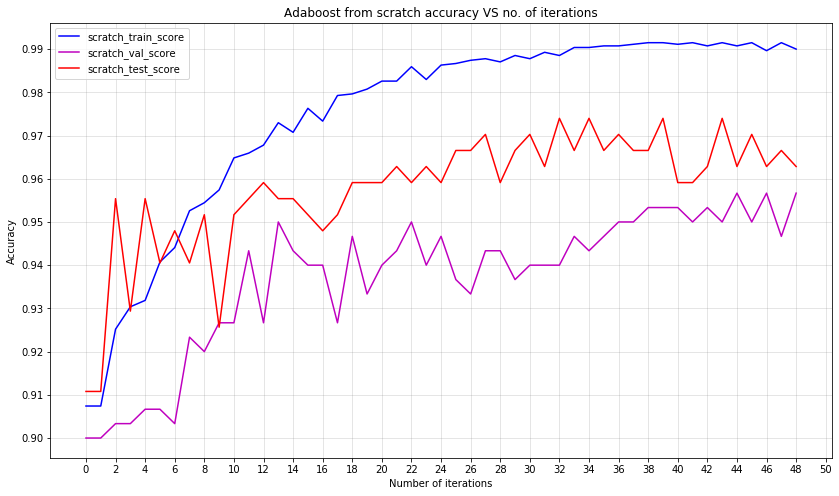

In [54]:
plt.figure(figsize=(14,8))
plt.yticks(np.arange(0,1,step= 0.01))
plt.xticks(np.arange(0,130,step= 2))
plt.plot(scratch_train_score_avg_list, 'b', label='scratch_train_score')
plt.plot(scratch_val_score_avg_list, 'm', label='scratch_val_score')
plt.plot(scratch_test_score_list, 'r',label='scratch_test_score')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Adaboost from scratch accuracy VS no. of iterations')
plt.grid(color='grey', linestyle='-', linewidth=1, alpha=0.2)
plt.legend()

### Adaboost from sklearn lib

In [21]:
from sklearn.ensemble import AdaBoostClassifier

In [22]:
def test_model_ada_lib(train_list, val_list, c):
    lib_val_score_list = []
    lib_train_score_list = []
    for i in range(len(train_list)):
        tclf = DecisionTreeClassifier(max_depth = 1)
        clf = AdaBoostClassifier(base_estimator = tclf, n_estimators=c)
        clf.fit(train_list[i][0], train_list[i][1])
    
        y_train_pred = clf.predict(train_list[i][0])
        y_val_pred = clf.predict(val_list[i][0])
      
        train_score = np.mean(train_list[i][1] == y_train_pred)
        val_score = np.mean(val_list[i][1] == y_val_pred)
    
        lib_val_score_list.append(val_score)
        lib_train_score_list.append(train_score)
        
        if (i+1)/(len(train_list)) ==1:
            val_score_avg = sum(lib_val_score_list)/len(lib_val_score_list)
            train_score_avg = sum(lib_train_score_list)/len(lib_train_score_list)
    return (train_score_avg, val_score_avg)

In [23]:
lib_train_score_avg_list = []
lib_val_score_avg_list = []
for n_clf in range(1,50):
    train_score_avg, val_score_avg = test_model_ada_lib(train_list, val_list, n_clf)
    lib_train_score_avg_list.append(train_score_avg)
    lib_val_score_avg_list.append(val_score_avg)

In [24]:
lib_test_accuracy=[]
for c in range(1,50):
    tclf = DecisionTreeClassifier(max_depth = 1)
    clf = AdaBoostClassifier(base_estimator = tclf, n_estimators=c)
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    score = np.mean(y_test == y_pred)
    lib_test_accuracy.append(round(score,5))

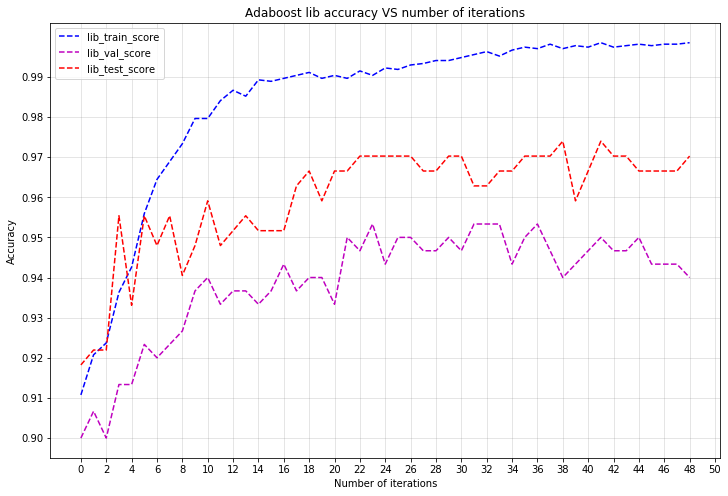

In [72]:
plt.figure(figsize=(12,8))
plt.yticks(np.arange(0,1,step= 0.01))
plt.xticks(np.arange(0,130,step= 2))

plt.plot(lib_train_score_avg_list, '--b', label='lib_train_score')
plt.plot(lib_val_score_avg_list, '--m', label='lib_val_score')
plt.plot(lib_test_accuracy, '--r', label='lib_test_score')

plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Adaboost lib accuracy VS number of iterations')
plt.grid(color='grey', linestyle='-', linewidth=1, alpha=0.2)
plt.legend()

#### Comparing Adaboost from scratch & library model

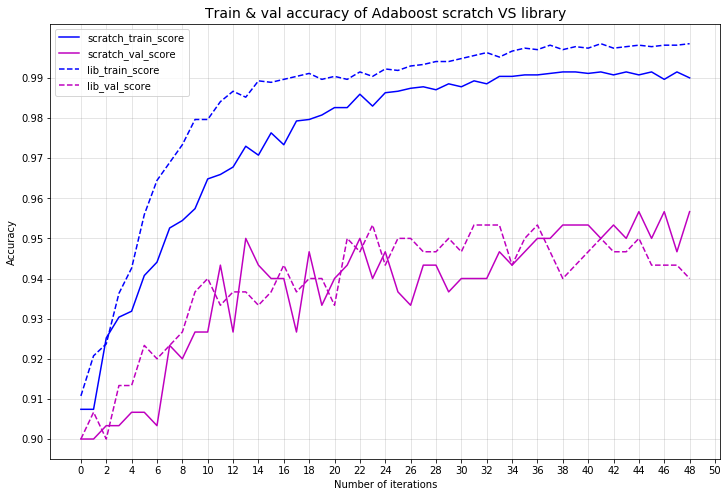

In [56]:
plt.figure(figsize=(12,8))
plt.yticks(np.arange(0,1,step= 0.01))
plt.xticks(np.arange(0,130,step= 2))

plt.plot(scratch_train_score_avg_list, 'b', label='scratch_train_score')
plt.plot(scratch_val_score_avg_list,'m', label='scratch_val_score')

plt.plot(lib_train_score_avg_list, '--b', label='lib_train_score')
plt.plot(lib_val_score_avg_list,'--m', label='lib_val_score')

plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Train & val accuracy of Adaboost scratch VS library', fontsize = 14)
plt.grid(color='grey', linestyle='-', linewidth=1, alpha=0.2)
plt.legend()

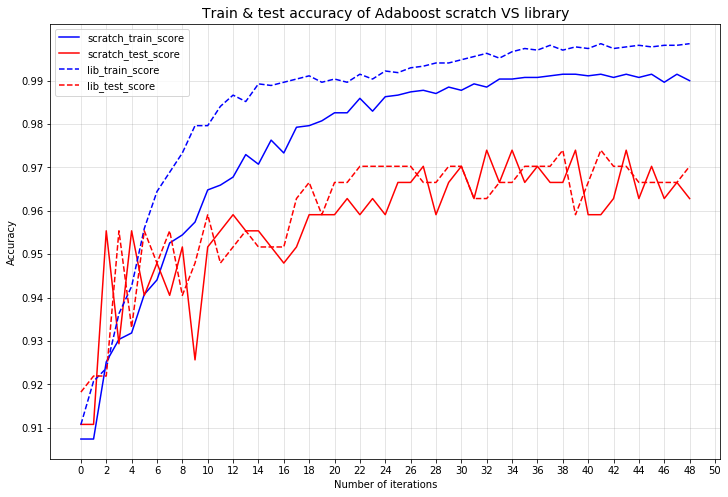

In [57]:
plt.figure(figsize=(12,8))
plt.yticks(np.arange(0,1,step= 0.01))
plt.xticks(np.arange(0,130,step= 2))

plt.plot(scratch_train_score_avg_list, 'b', label='scratch_train_score')
plt.plot(scratch_test_score_list, 'r', label='scratch_test_score')

plt.plot(lib_train_score_avg_list, '--b', label='lib_train_score')
plt.plot(lib_test_accuracy, '--r', label='lib_test_score')

plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Train & test accuracy of Adaboost scratch VS library', fontsize=14)
plt.grid(color='grey', linestyle='-', linewidth=1, alpha=0.2)
plt.legend()

#### Execution Time Adaboost 

In [99]:
import time

start_time = time.time()

clf = AdaBoostClassifier(base_estimator = tclf, n_estimators=22)
clf.fit(X, y)

print ("Adaboost takes", time.time() - start_time, "seconds to train the mode")

Adaboost takes 0.04716897010803223 seconds to train the mode


In [92]:
start_time = time.time()

y_pred = clf.predict(X_test)
score = np.mean(y_test == y_pred)
print('Test score', round(score,4))

print ("Adaboost takes", time.time() - start_time, "seconds to test the model")

Test score 0.9665
Adaboost takes 0.007901191711425781 seconds to test the model


### Experiment with depth of weak learners

#### Experiment with depth of weak learners Adaboost from Library

In [38]:
lib_test_accuracy_d = []
for d in range(1,5,1):
    for c in range(1,120):
        tclf = DecisionTreeClassifier(max_depth = d)
        clf = AdaBoostClassifier(base_estimator = tclf, n_estimators=c)
        clf.fit(X, y)
        y_pred = clf.predict(X_test)
        score = np.mean(y_test == y_pred)
        lib_test_accuracy_d.append(round(score,5)) 

In [58]:
lib_test_accuracy_d_1 = lib_test_accuracy_d[:119]
lib_test_accuracy_d_2 = lib_test_accuracy_d[119:238]
lib_test_accuracy_d_3 = lib_test_accuracy_d[238:357]
lib_test_accuracy_d_4 = lib_test_accuracy_d[357:]

print(len(lib_test_accuracy_d_1), len(lib_test_accuracy_d_2), len(lib_test_accuracy_d_3), len(lib_test_accuracy_d_4))

119 119 119 119


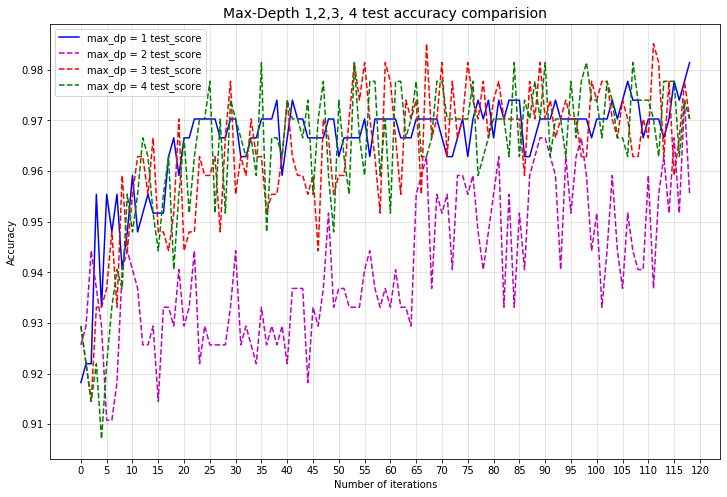

In [40]:
plt.figure(figsize=(12,8))
plt.yticks(np.arange(0,1,step= 0.01))
plt.xticks(np.arange(0,130,step= 5))

plt.plot(lib_test_accuracy_d_1, 'b', label='max_dp = 1 test_score')
plt.plot(lib_test_accuracy_d_2, '--m', label='max_dp = 2 test_score')
plt.plot(lib_test_accuracy_d_3, '--r', label='max_dp = 3 test_score')
plt.plot(lib_test_accuracy_d_4, '--g', label='max_dp = 4 test_score')

plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Max-Depth 1,2,3, 4 test accuracy comparision', fontsize=14)
plt.grid(color='grey', linestyle='-', linewidth=1, alpha=0.2)
plt.legend()

#### Training score with different max-depths 

In [41]:
lib_train_accuracy_d = []
for d in range(1,5,1):
    for c in range(1,120):
        tclf = DecisionTreeClassifier(max_depth = d)
        clf = AdaBoostClassifier(base_estimator = tclf, n_estimators=c)
        clf.fit(X, y)
        y_pred = clf.predict(X)
        score = np.mean(y == y_pred)
        lib_train_accuracy_d.append(round(score,5))

In [42]:
lib_train_accuracy_d_1 = lib_train_accuracy_d[:119]
lib_train_accuracy_d_2 = lib_train_accuracy_d[119:238]
lib_train_accuracy_d_3 = lib_train_accuracy_d[238:357]
lib_train_accuracy_d_4 = lib_train_accuracy_d[357:]

print(len(lib_train_accuracy_d_1), len(lib_train_accuracy_d_2), len(lib_train_accuracy_d_3))

119 119 119


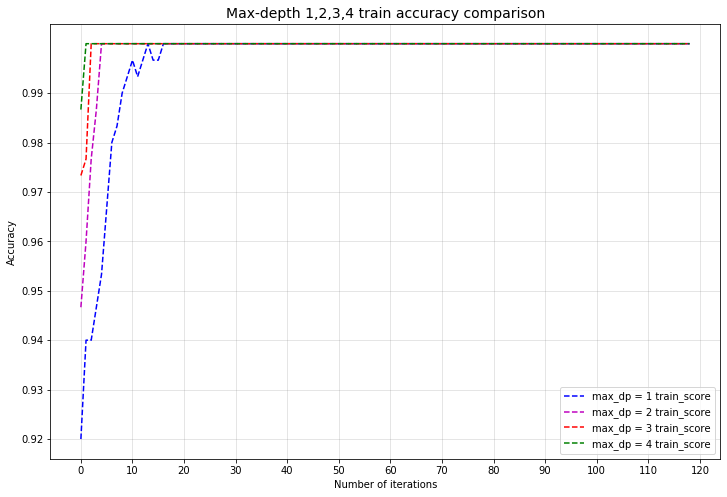

In [43]:
plt.figure(figsize=(12,8))
plt.yticks(np.arange(0,1,step= 0.01))
plt.xticks(np.arange(0,130,step= 10))

plt.plot(lib_train_accuracy_d_1, '--b', label='max_dp = 1 train_score')
plt.plot(lib_train_accuracy_d_2, '--m', label='max_dp = 2 train_score')
plt.plot(lib_train_accuracy_d_3, '--r', label='max_dp = 3 train_score')
plt.plot(lib_train_accuracy_d_4, '--g', label='max_dp = 4 train_score')

plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Max-depth 1,2,3,4 train accuracy comparison', fontsize = 14)
plt.grid(color='grey', linestyle='-', linewidth=1, alpha=0.2)
plt.legend()

#### Experiment with logistic regression in Adaboost 

In [59]:
from sklearn.linear_model import LogisticRegression
lib_train_accuracy_LR = []
lib_test_accuracy_LR = []

for c in range(1,120):
    lr = LogisticRegression(solver='liblinear')
    clf = AdaBoostClassifier(base_estimator = lr, n_estimators=c)
    clf.fit(X, y)
    train_y_pred = clf.predict(X)
    y_pred = clf.predict(X_test)
    
    train_score = np.mean(y == train_y_pred)
    score = np.mean(y_test == y_pred)
    
    lib_test_accuracy_LR.append(round(score,5)) 
    lib_train_accuracy_LR.append(round(train_score,5))

In [60]:
lib_train_accuracy_dt = []
lib_test_accuracy_dt = []

for c in range(1,120):
    tclf = DecisionTreeClassifier(max_depth = 1)
    clf = AdaBoostClassifier(base_estimator = tclf, n_estimators=c)
    clf.fit(X, y)
    train_y_pred = clf.predict(X)
    y_pred = clf.predict(X_test)
    
    train_score = np.mean(y == train_y_pred)
    score = np.mean(y_test == y_pred)
    
    lib_test_accuracy_dt.append(round(score,5)) 
    lib_train_accuracy_dt.append(round(train_score,5))

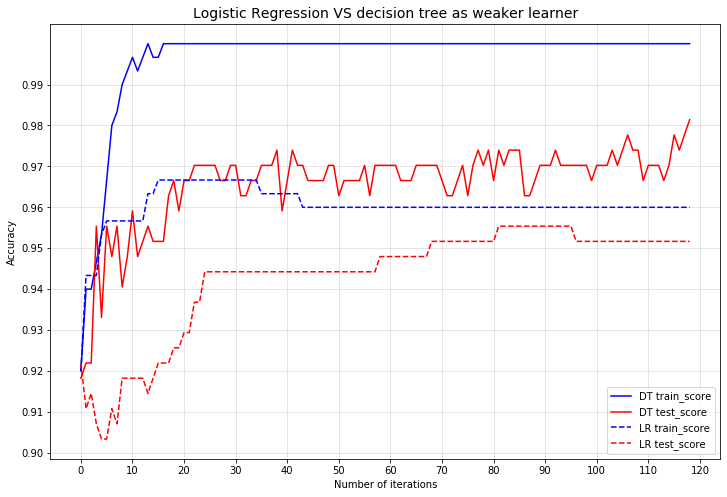

In [63]:
plt.figure(figsize=(12,8))
plt.yticks(np.arange(0,1,step= 0.01))
plt.xticks(np.arange(0,130,step= 10))

plt.plot(lib_train_accuracy_dt, 'b', label='DT train_score')
plt.plot(lib_test_accuracy_dt, 'r', label='DT test_score')

plt.plot(lib_train_accuracy_LR, '--b', label='LR train_score')
plt.plot(lib_test_accuracy_LR, '--r', label='LR test_score')

plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Logistic Regression VS decision tree as weaker learner', fontsize = 14)
plt.grid(color='grey', linestyle='-', linewidth=1, alpha=0.2)
plt.legend()
